In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


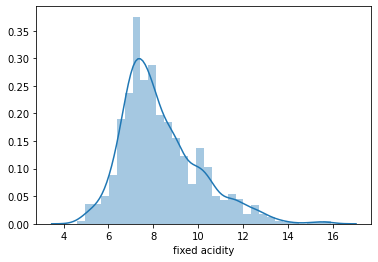

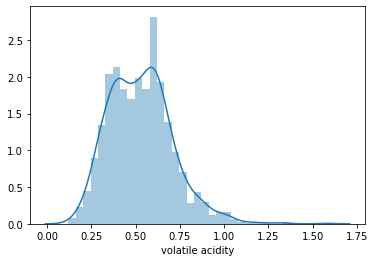

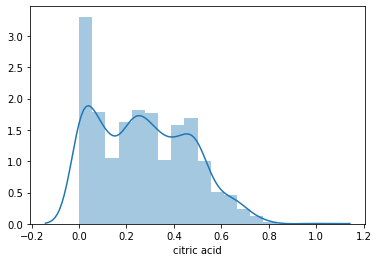

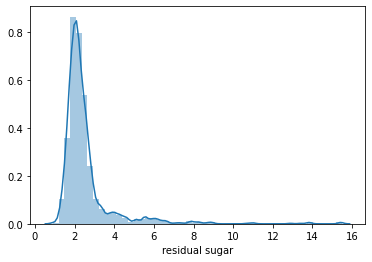

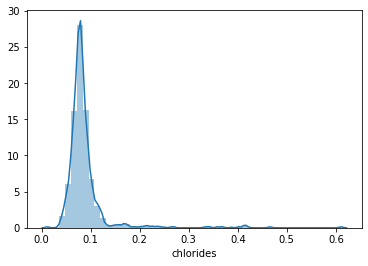

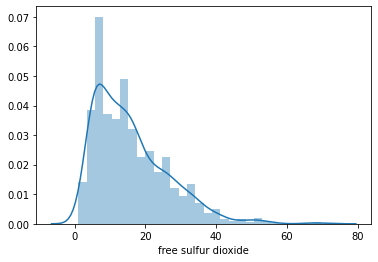

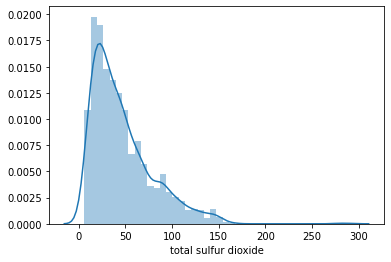

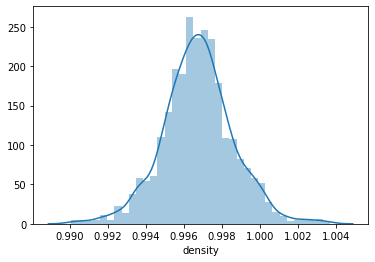

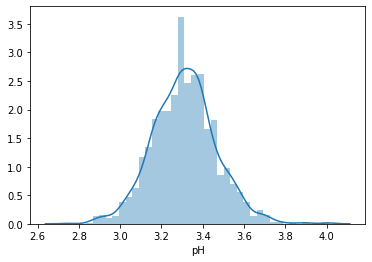

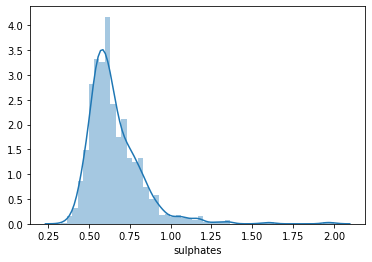

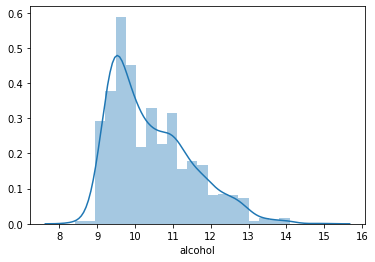

In [7]:
for col in data.columns:
    if col != 'quality':
        sns.distplot(data[col])
        plt.xlabel(col)
        plt.show()
    

In [8]:
#most of the columns are having skewed data
#left skewed
#residual_sugar, chlorides, free sulphur dioxide, total suplur dioxide, sulphates and alchohol

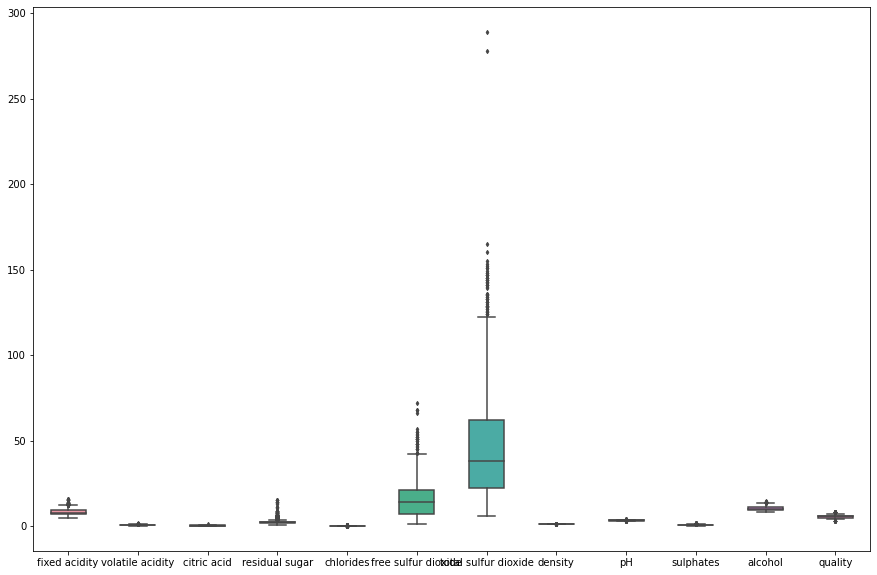

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
#most of the columns have outliers and hence skewed.
q = data['fixed acidity'].quantile(0.99)
data_cleaned = data[data['fixed acidity']<q]
q = data_cleaned['residual sugar'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['residual sugar']<q]
q = data_cleaned['chlorides'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['chlorides']<q]
q = data_cleaned['free sulfur dioxide'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['free sulfur dioxide']<q]
q = data_cleaned['total sulfur dioxide'].quantile(0.90)
data_cleaned = data_cleaned[data_cleaned['total sulfur dioxide']<q]
q = data_cleaned['sulphates'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['sulphates']<q]
q = data_cleaned['alcohol'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['alcohol']<q]

data_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


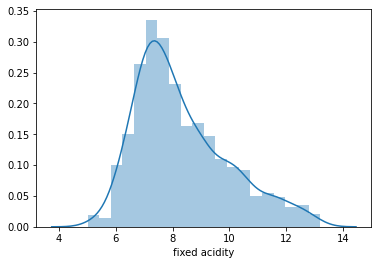

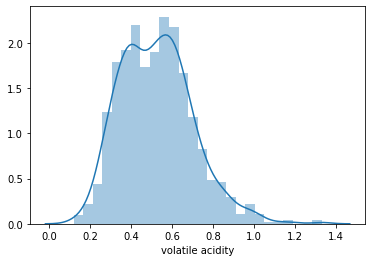

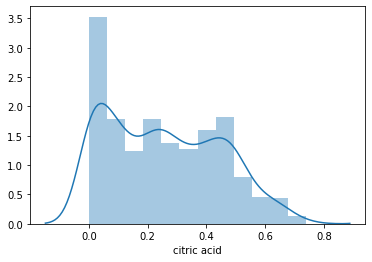

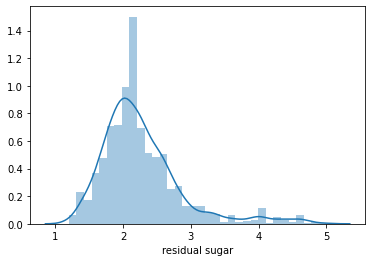

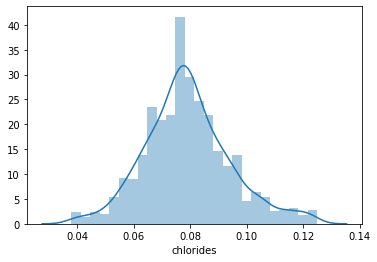

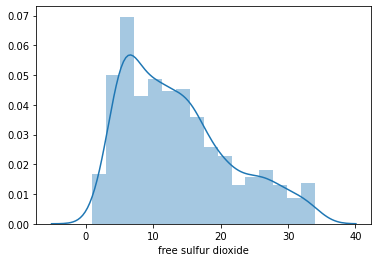

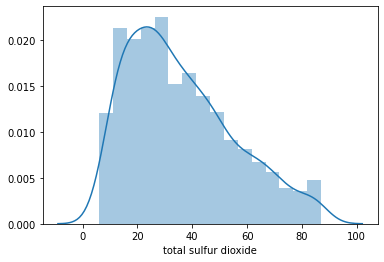

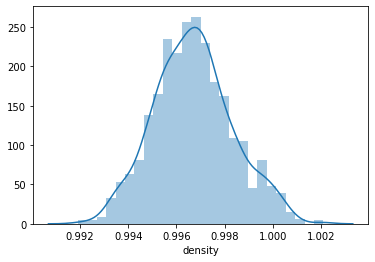

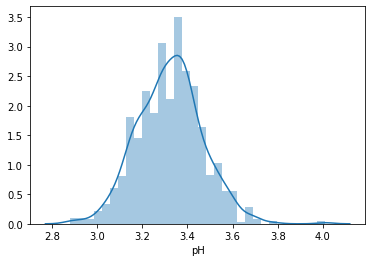

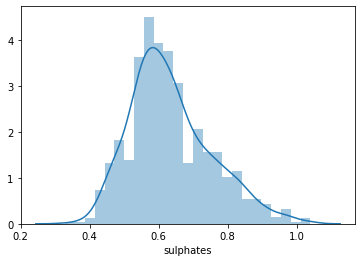

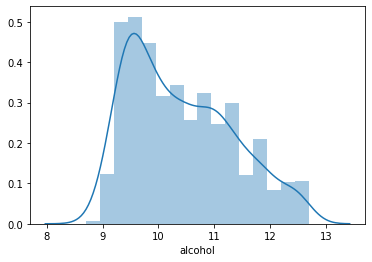

In [12]:
for col in data_cleaned.columns:
    if col != 'quality':
        sns.distplot(data_cleaned[col])
        plt.xlabel(col)
        plt.show()

In [13]:
X = data_cleaned.drop(['quality'], axis = 1)
y = data_cleaned['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
X.shape

(1163, 11)

In [25]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [16]:
y.shape

(1163,)

In [17]:
y.unique()

array([5, 6, 7, 4, 8, 3])

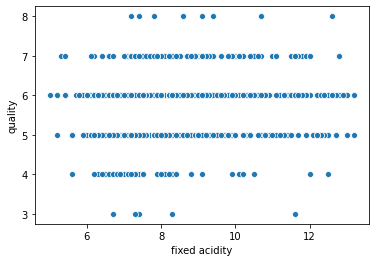

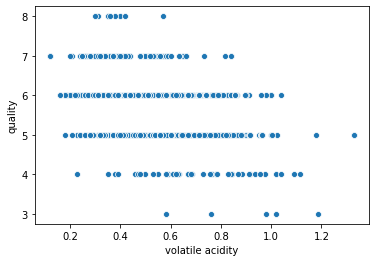

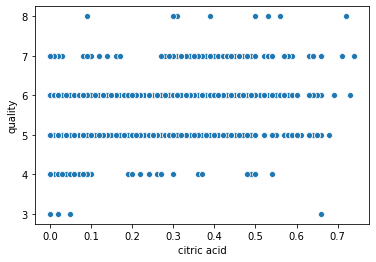

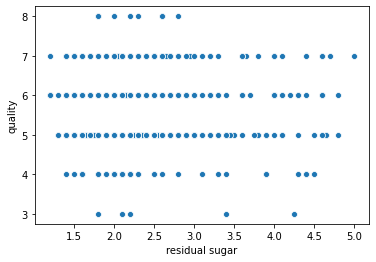

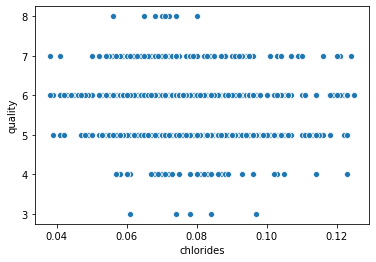

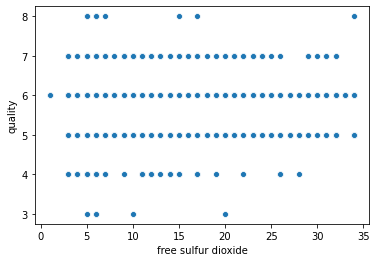

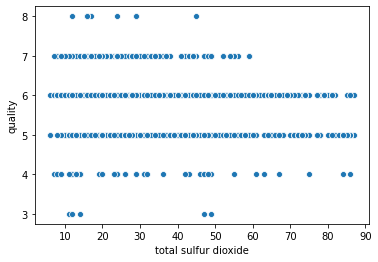

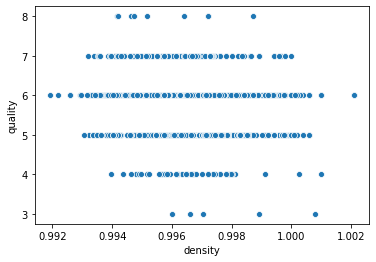

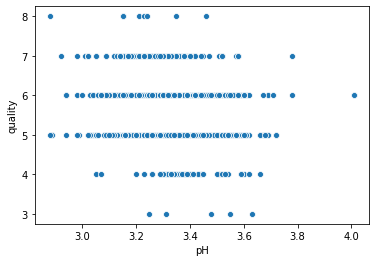

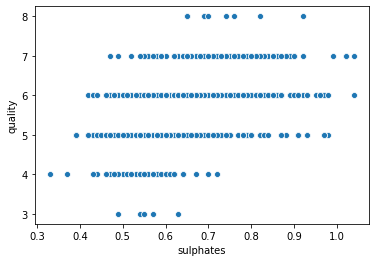

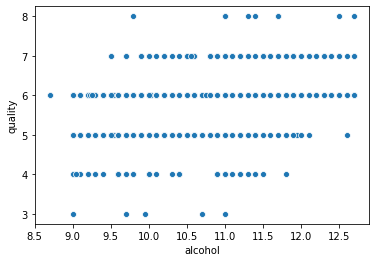

In [18]:
for col in X.columns:
    sns.scatterplot(X[col], y )
    plt.xlabel(col)
    plt.ylabel('quality')
    plt.show()

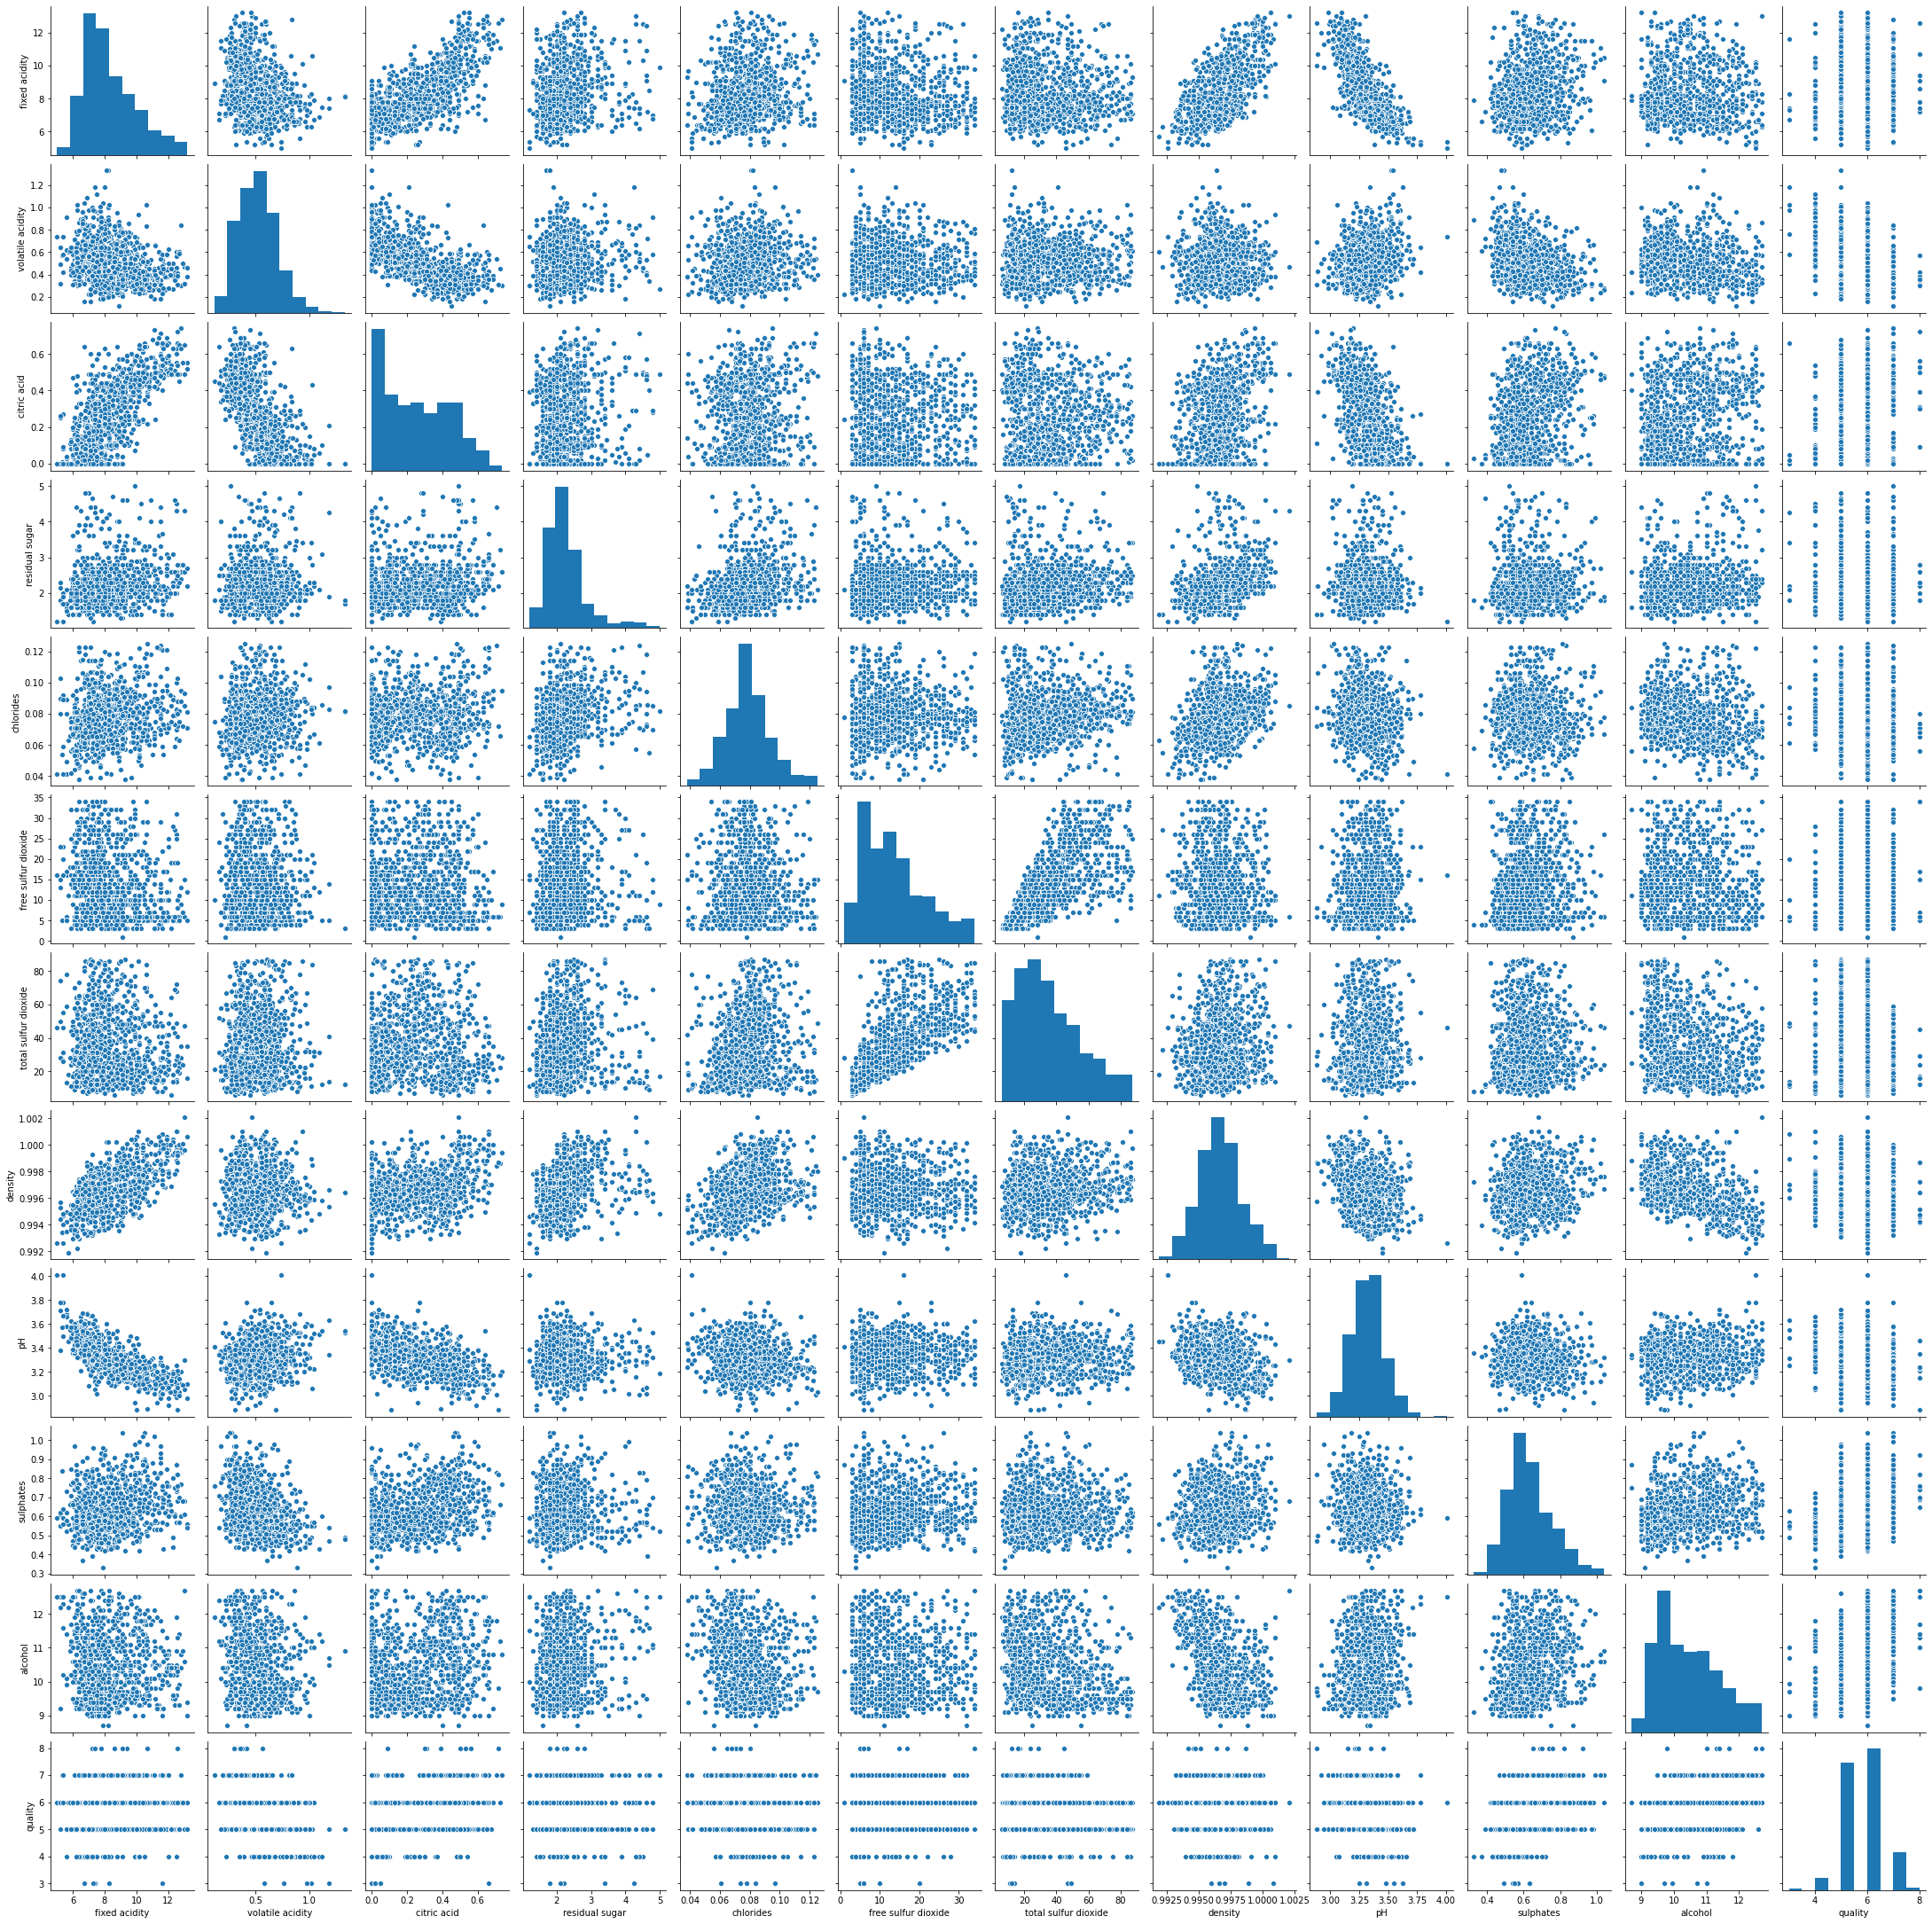

In [19]:
sns.pairplot(data_cleaned)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [15]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
clf.score(x_train,y_train)

1.0

In [69]:
y_pred = clf.predict(x_test)

In [70]:
clf.score(x_test,y_test)

0.5816618911174785

In [71]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5816618911174785

In [72]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)


[[ 0  1  0  1  0  0]
 [ 0  1  8  4  0  0]
 [ 0  8 91 39  7  0]
 [ 0  1 38 92 17  2]
 [ 0  2  0 15 19  2]
 [ 0  0  0  0  1  0]]


In [73]:
y_prob = clf.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.581784 (macro),
0.629163 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.597356 (macro),
0.675217 (weighted by prevalence)


In [74]:
X.shape

(1163, 11)

In [16]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [76]:
x_transform

array([[-0.55961655,  0.98916144, -1.34466508, ...,  1.29333772,
        -0.63284191, -1.06657996],
       [-0.3161776 ,  2.00384259, -1.34466508, ..., -0.84726297,
         0.38022779, -0.63998465],
       [-0.3161776 ,  1.32738849, -1.13472476, ..., -0.43295316,
         0.12696037, -0.63998465],
       ...,
       [-1.22907368, -0.08189089, -0.66235902, ...,  0.671873  ,
         0.97118512,  0.63980125],
       [-1.47251264,  0.67911998, -0.7148441 , ...,  1.70764753,
         0.63349522, -0.21338935],
       [-1.4116529 , -1.20931439,  1.12213375, ...,  0.4647181 ,
         0.21138284,  0.63980125]])

In [77]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

In [78]:
clf1 = DecisionTreeClassifier()
clf1.fit(x_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
clf1.score(x_train1, y_train1)

1.0

In [80]:
y_pred1 = clf1.predict(x_test1)

In [81]:
clf1.score(x_test1, y_test1)

0.5845272206303725

In [82]:
y_prob1 = clf1.predict_proba(x_test1)

macro_roc_auc_ovo1 = roc_auc_score(y_test1, y_prob1, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo1 = roc_auc_score(y_test1, y_prob1, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr1 = roc_auc_score(y_test1, y_prob1, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr1 = roc_auc_score(y_test1, y_prob1, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo1, weighted_roc_auc_ovo1))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr1, weighted_roc_auc_ovr1))

One-vs-One ROC AUC scores:
0.586335 (macro),
0.623996 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.600852 (macro),
0.673440 (weighted by prevalence)


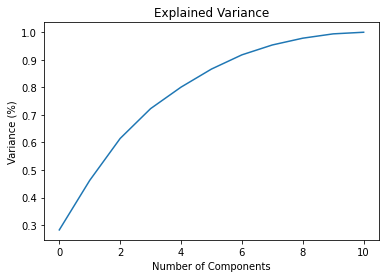

In [18]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [19]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [20]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,1.721824,-1.055288,-1.181128,-0.447137,0.922388,-0.459635,-0.352488,-0.512402
1,0.869928,-2.805232,0.556175,0.394057,-0.189894,0.284576,1.947728,0.804037
2,0.722462,-1.732179,-0.327554,0.058546,0.180282,0.275191,1.083517,0.460925
3,-2.475872,-0.500017,0.939202,-1.792243,-0.929080,-0.162890,-0.516774,-0.565275
4,1.721824,-1.055288,-1.181128,-0.447137,0.922388,-0.459635,-0.352488,-0.512402
...,...,...,...,...,...,...,...,...
1158,1.530942,-0.564506,1.382472,-0.791580,1.573514,-0.525809,0.812717,0.600003
1159,2.348958,-0.858542,1.434848,0.057058,-0.452083,1.089678,0.395922,-0.062706
1160,1.501659,0.074713,1.988305,0.456123,0.472943,0.164049,0.480173,0.400769
1161,2.577616,-0.625468,1.891874,-0.031030,0.810111,0.047281,0.293939,-0.208099


In [21]:
# let's see how well our model perform on this new data
x_train2,x_test2,y_train2,y_test2 = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier()
clf2.fit(x_train2,y_train2)
clf2.score(x_test2,y_test2)

0.5128939828080229

In [22]:
grid_param = {
    'criterion':['gini', 'emtropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [23]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_param,
                          cv = 5,
                          n_jobs = -1)

In [24]:
grid_search.fit(x_train,y_train)

/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'emtropy'],
                     

In [101]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'random'}


In [102]:
grid_search.best_score_

0.6178898735135954

In [103]:
clf3 = DecisionTreeClassifier(criterion = 'gini', max_depth =29, min_samples_leaf= 8, min_samples_split= 5, splitter ='random')
clf3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=29, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
clf = DecisionTreeClassifier

In [111]:
clf3.score(x_test,y_test)

0.5644699140401146

In [112]:
X = data.drop(['quality'], axis = 1)
y = data['quality']


In [113]:
X.shape

(1599, 11)

In [114]:
y.shape

(1599,)

In [115]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [116]:
#let's first visualize the tree on the data without doing any pre processing
clf4 = DecisionTreeClassifier()
clf4.fit(x_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:
clf4.score(x_test3,y_test3)

0.6395833333333333

In [118]:
scalar = StandardScaler()

x_transform1 = scalar.fit_transform(X)

In [119]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(x_transform1,y,test_size = 0.30, random_state= 355)

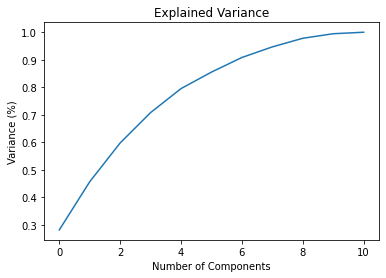

In [120]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [121]:
pca = PCA(n_components=8)
new_data1 = pca.fit_transform(x_transform1)

principal_x1 = pd.DataFrame(new_data1,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [135]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(principal_x1,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf5 = DecisionTreeClassifier()
clf5.fit(x_train5,y_train5)
clf5.score(x_test5,y_test5)

0.6

In [136]:
grid_param1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [137]:
grid_search1 = GridSearchCV(estimator=clf5,
                     param_grid=grid_param1,
                     cv=5,
                    n_jobs =-1)

In [138]:
grid_search1.fit(x_train5,y_train5)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [139]:
best_parameters1 = grid_search1.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'random'}


In [140]:
grid_search1.best_score_

0.5951993914157592

In [141]:
clf6 = DecisionTreeClassifier(criterion = 'gini', max_depth =29, min_samples_leaf= 8, min_samples_split= 5, splitter ='random')
clf6.fit(x_train5,y_train5)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=29, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [147]:
clf6.score(x_test5,y_test5)

0.5145833333333333